In [1]:
# Import (load) the python packages that are required for this analysis. You may need to download them #
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xbpch
import iris
import iris.plot as iplt

#from gamap_colormap import WhGrYlRd
import sys
from matplotlib.colors import LogNorm
import matplotlib

#import rasterio as rio
import os
# import earthpy as et

# import xesmf as xe
from matplotlib.colors import BoundaryNorm
import numpy.ma as ma
from matplotlib.patches import Polygon
import cartopy
import cartopy.feature as cfeature

In [2]:
# warning suppression - deprecation warnings only

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Import PAH concentrations

In this script, I will load in the global and Arctic council state data on the basis of slow ozonolysis (base - slow reaction kinetics) and visualize the global "control" data on BAP.

In [95]:
# Load the data and print an example. (here, BAP)
# print data information to screen so user can see structure and numerical ranges

PAH_Species = ['NAP', 'NAP', 'ACY', 'ACE', 'FLO', 'PHE', 'ANT', 'FLA', 'PYR', 'BAA', 'BBF', 'BKF', 'BAP', 'ICDP', 'DAHA', 'BHP', 'NPYR', 'DNPYR']
PAH_Concentrations = []

PAH_files = ['210105_A/', '210105_B/', '210105_C/', '210105_J/', '201109_K/', '201109_L/', '201109_N/']
PAH_totals =[]

for y in range(0, len(PAH_files)):
    PAH_Concentrations = []
    for x in range(0, len(PAH_Species)):
        conc = iris.load('/net/fs03/d1/jamiekel/mod_analysis/rundir_' 
                         + PAH_files[y] 
                         + PAH_Species[x] 
                         + '.nc')[0]
        print(conc)
        PAH_Concentrations.append(conc[0])
        # print(PAH_Concentrations)
    PAH_totals.append(PAH_Concentrations)

unknown / (1)                       (lev: 47; latitude: 91; longitude: 144)
     Dimension coordinates:
          lev                           x             -              -
          latitude                      -             x              -
          longitude                     -             -              x
     Scalar coordinates:
          time: 2014-03-17 00:00:00, bound=(2014-01-01 00:00:00, 2014-06-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
unknown / (1)                       (lev: 47; latitude: 91; longitude: 144)
     Dimension coordinates:
          lev                           x             -              -
          latitude                      -             x              -
          longitude                     -             -              x
     Scalar coordinates:
          time: 2014-03-17 00:00:00, bound=(2014-01-01 00:00:00, 2014-06-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
unknown / (1)                       (lev: 47; lati

In [290]:
PAH_totals[1][12]

<iris 'Cube' of unknown / (1) (latitude: 91; longitude: 144)>

In [96]:
BAP = PAH_totals[2][12]
# print (BAP)
print ('')
print ('printing what this "looks" like to the user...')
print (BAP)
print ('')
print ('printing range (minimum/maximum) values to show user....')
print ('min concentration BAP = ', np.min(BAP.data))
print ('max concentration BAP = ',  np.max(BAP.data))


printing what this "looks" like to the user...
unknown / (1)                       (latitude: 91; longitude: 144)
     Dimension coordinates:
          latitude                           x              -
          longitude                          -              x
     Scalar coordinates:
          lev: 0
          time: 2014-03-17 00:00:00, bound=(2014-01-01 00:00:00, 2014-06-01 00:00:00)
     Attributes:
          Conventions: CF-1.5

printing range (minimum/maximum) values to show user....
min concentration BAP =  0.0
max concentration BAP =  23.74234


# define a plotting function for any Iris Cube format

In [97]:
# pass the list of all regional concentrations from above
# pass the string for the region you want

def BAP_plotter(totals):
    for i in range(0, len(totals)):
        BAP = totals[i][12]

        # Manually define countour levels 
        contour_levels         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

        # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
        cmap = plt.cm.get_cmap('YlOrRd')

        # combine the countour levels and colour scale 
        norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

        # create blank figure with manually-defined size (inches)
        plt.figure(figsize=(10, 7))                                                      

        # define how many sub-plots will be in this, and the geospatial projection
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

        # plot a title 
        plt.title('Simulated (GEOS-Chem) annual-average BAP concentration', fontsize=12)

        # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
        mesh = iplt.pcolormesh(BAP, cmap=cmap, norm=norm)

        # plot a colour bar 
        bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
        bar.set_ticks(contour_levels[1:-1])
        bar.set_ticklabels(contour_levels[1:-1])
        bar.ax.tick_params(labelsize=12, rotation=60)
        bar.set_label('ng m$^{-3}$', fontsize=12)
        plt.gca().autoscale(False)

        # overlay coastlines on the map 
        plt.gca().coastlines()

        # make figure look prettier by trying to expand the images to cover white space
        plt.tight_layout()
        
        source_zones = ['Global', 'Arctic', 'USA', 'Russia', 'LRTAP', 'East Asia', 'ROW']
        for zone in range(0, len(source_zones)):
            if totals[i] == source_zones[zone]:
                title = 'Spatial_Conc_' + totals[i] + '.png'

                # save the figure 
                plt.savefig(title, dpi=300)

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'lo

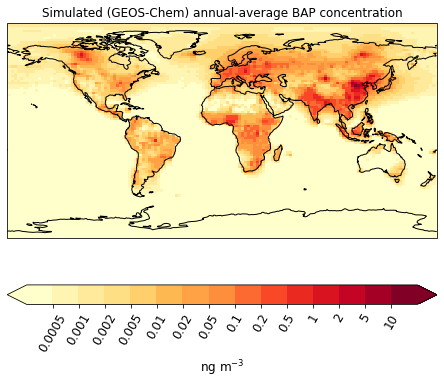

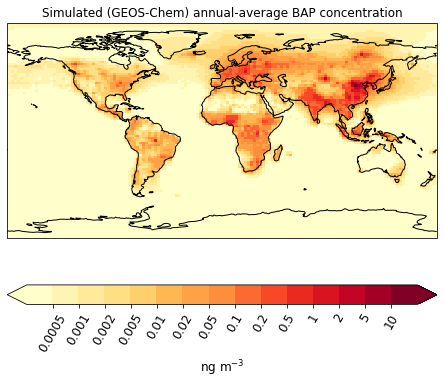

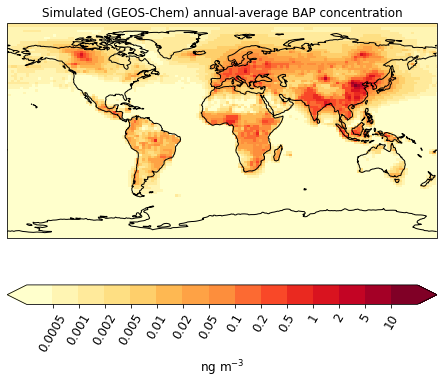

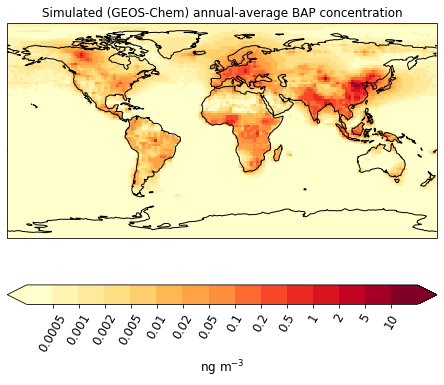

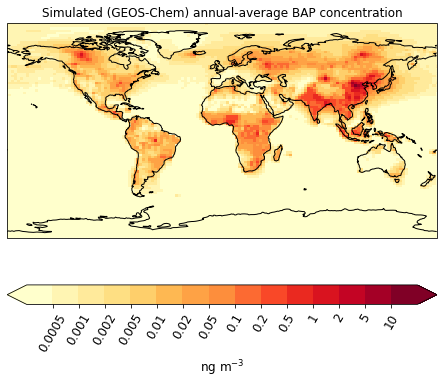

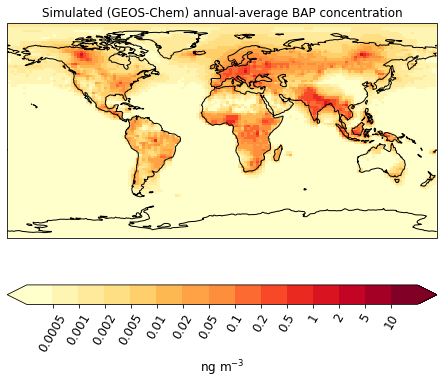

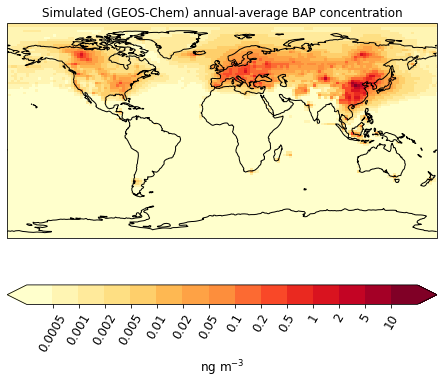

In [6]:
BAP_plotter(PAH_totals)

# plot the individual regions' concentrations

In [7]:
# pass the list of all regional concentrations from above
# pass the string for the regions you want to subtract

def BAP_subtractor(totals, zone_1, zone_2):
    source_zones = ['Global', 'Arctic', 'USA', 'Russia', 'LRTAP', 'East Asia', 'ROW']
    index1 = 0
    index2 = 0
    for zone in range(0, len(source_zones)):
        if zone_1 == source_zones[zone]:
            index1 = source_zones.index(source_zones[zone])
        if zone_2 == source_zones[zone]:
            index2 = source_zones.index(source_zones[zone])
        
    BAP = totals[index1][12] - totals[index2][12]

    # Manually define countour levels 
    contour_levels         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

    # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
    cmap = plt.cm.get_cmap('YlOrRd')

    # combine the countour levels and colour scale 
    norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

    # create blank figure with manually-defined size (inches)
    plt.figure(figsize=(10, 7))                                                      

    # define how many sub-plots will be in this, and the geospatial projection
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

    plot_title = 'Simulated (GEOS-Chem) annual-average BAP concentration in ' + zone_2

    # plot a title 
    plt.title(plot_title, fontsize=12)

    # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
    mesh = iplt.pcolormesh(BAP, cmap=cmap, norm=norm)

    # plot a colour bar 
    bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
    bar.set_ticks(contour_levels[1:-1])
    bar.set_ticklabels(contour_levels[1:-1])
    bar.ax.tick_params(labelsize=12, rotation=60)
    bar.set_label('ng m$^{-3}$', fontsize=12)
    plt.gca().autoscale(False)

    # overlay coastlines on the map 
    # plt.gca().coastlines()
    plt.gca().coastlines(resolution='50m', linewidth=0.5, color='black')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)

    # make figure look prettier by trying to expand the images to cover white space
    plt.tight_layout()

    #for zone in range(0, len(source_zones)):
    title = 'Spatial_Conc_' + zone_1 + '_' + zone_2 + 'Slow_Rxns' + '.png'

    # save the figure 
    plt.savefig(title, dpi=300)

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


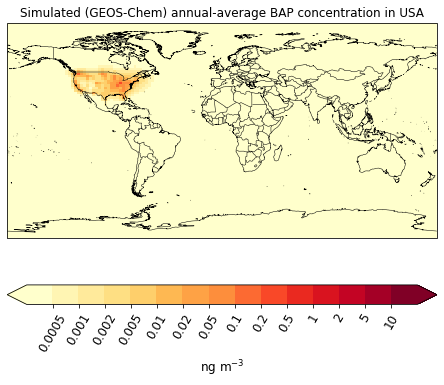

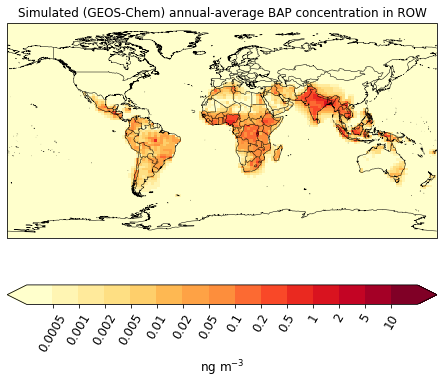

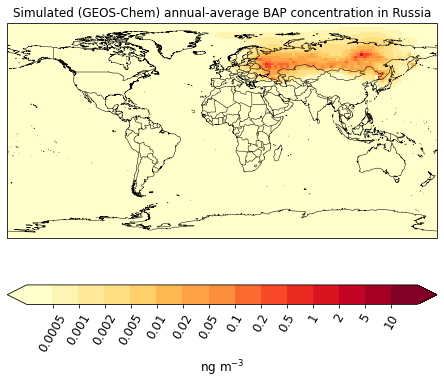

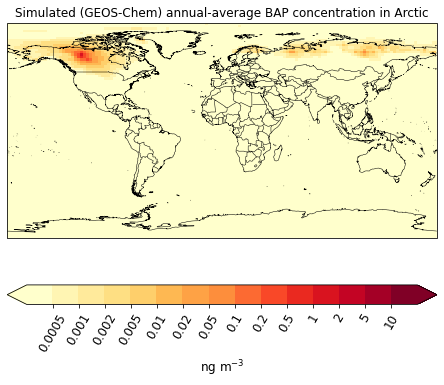

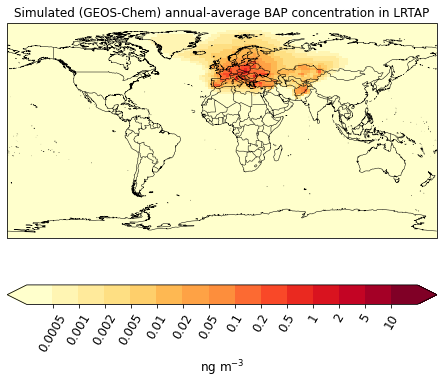

In [8]:
# just calculate concentration differences between global and US sourced pollution here
# can test it with any difference
BAP_subtractor(PAH_totals, 'Global', 'USA')
BAP_subtractor(PAH_totals,  'Global', 'ROW')
BAP_subtractor(PAH_totals,  'Global', 'Russia')
BAP_subtractor(PAH_totals,  'Global', 'Arctic')
BAP_subtractor(PAH_totals,  'Global', 'LRTAP')

# load information for incremental lifetime cancer risk calculations

In [98]:
# load in population, mask, mortality files

pop_dens_path = 'PKU_PAH_emissions/HTAP/gpw_v4_population_density_rev11_2015_1_deg_2_25.nc'
mask_path = 'PKU_PAH_emissions/HTAP/region_mask_Arctic_ext.nc'
SA_path = 'mod_analysis/rundir_201215_A/Surface_Area_GridCells.nc'

mask = iris.load('/net/fs11/d0/jamiekel/' + mask_path)[0]
SA = iris.load('/net/fs11/d0/jamiekel/' + SA_path)[0]
pop_dens = iris.load('/net/fs11/d0/jamiekel/' + pop_dens_path)[0]
#print(pop_dens)

In [10]:
mask

<iris 'Cube' of source_code / (Degree) (latitude: 91; longitude: 144)>

# define general plotting function
## phase out the BAP plotter above in your next code cleanup

In [11]:
# plotting function
# takes Iris cube, contour levels, title, color scheme

def _plotter(cube, contour_lev, color_scheme, plot_title, plot_size):

    # combine the countour levels and colour scale 
    norm = BoundaryNorm(contour_lev, ncolors=color_scheme.N, clip=True)

    # create blank figure with manually-defined size (inches)
    plt.figure(figsize=plot_size)                                                      

    # define how many sub-plots will be in this, and the geospatial projection
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

    plot_title = 'mask plot'

    # plot a title 
    plt.title(plot_title, fontsize=12)

    # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
    mesh = iplt.pcolormesh(cube, cmap=color_scheme, norm=norm)

    # plot a colour bar 
    bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
    bar.set_ticks(contour_lev[1:-1])
    bar.set_ticklabels(contour_lev[1:-1])
    bar.ax.tick_params(labelsize=12, rotation=60)
    bar.set_label('ng m$^{-3}$', fontsize=12)
    plt.gca().autoscale(False)

    # overlay coastlines on the map 
    # plt.gca().coastlines()
    plt.gca().coastlines(resolution='50m', linewidth=0.5, color='black')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)

    # make figure look prettier by trying to expand the images to cover white space
    plt.tight_layout()

    #for zone in range(0, len(source_zones)):
    title = plot_title + '.png'

    # save the figure 
    plt.savefig(title, dpi=300)

# plot the mask regions

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


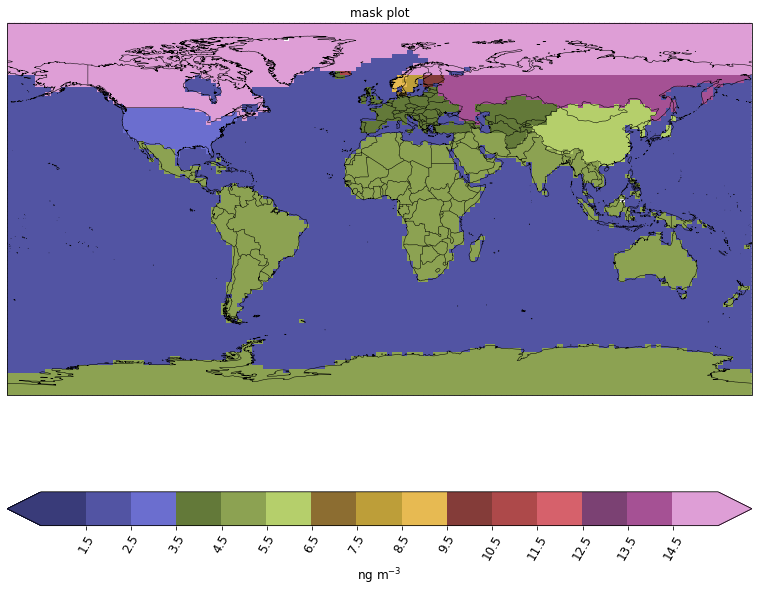

In [12]:
cont_lev = np.arange(0.5, 16.5, 1)
mask_title = 'Mask Plot'
schema = plt.cm.get_cmap('tab20b')
mask_fig_size = (15, 12)

# plot the mask plot
_plotter(mask, cont_lev, schema, mask_title, mask_fig_size)

Recording for future use:

- 2 = ocean
- 3 = USA
- 4 = LRTAP? includes Europe and central  asia
- 5 = rest of the world / global south
- 6 = china
- 7-11 = scandinavia? a section that doesn't fully make sense
 - 7 = Denmark
 - 8 = Sweden
 - 9 = Norway
 - 10 = Finland
 - 11 = Greenland
- 14 = russia
- 15 = arctic 

# run some tests on pop density, SA, other attributes for sanity

In [13]:
# test some grid square somewhere in LRTAP
mask.data[70,100]

4

In [14]:
# check the population density in that grid square
pop_dens.data[70,100]

3.4009948

This is the surface area of one grid square at these coordinates. These grid squares vary in size because the earth is round and these grid squares are larger near  the equator, smaller near the poles

In [15]:
# get test surface area
SA.data[70,100]

39786025000.0

In [16]:
# test the population density bounds, because Jamie thinks neg numbers may be present
# doesn't *look* like there are negative numbers, but could be mistaken
# these dashes are likely "null" or "nan" values that don't get auto-handled in numpy

print(pop_dens.data, "\n population density\n")
print(pop_dens.data.min, "\n min val\n")
print(pop_dens.data.max, "\n max val\n")

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]] 
 population density

<bound method MaskedArray.min of masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-3.402823e+38,
  dtype=float32)> 
 min val

<bound method MaskedArray.max of masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --

# cancer risk calculations

In [17]:
# calculate cancer risk (unitless value) from this simple case, one point in LRTAP

# estimating the unit risk using Armstrong et al. 2004, cited in Kelly et al. 2021
URe = 32.7 * 10**(-6)  # m^3 / ng
test_pop_dens = pop_dens.data[70,100] # people / km^2
test_SA_meters = SA.data[70,100] #m^2 
test_SA = test_SA_meters / 10**6

# calculate unitless value for cancer risk at this single grid square in LRTAP
# divide by 70 to get ILCR, which is the average life expectancy
test_unitless = BAP.data[70,100] * URe
print(test_unitless)
test_CR = BAP.data[70,100] * URe  * test_pop_dens * test_SA  / 70
print(test_CR)

4.927729723043741e-07
0.0009525446789873977


In [18]:
test_lat = 66 
test_long = 93

dens = np.nan_to_num(float(pop_dens.data[test_lat,test_long]))
print(dens, "dens")
ILCR = BAP.data[test_lat,test_long] * URe  * dens * SA.data[test_lat, test_long] * 1 / (70 * 10**6)
print(ILCR, "ILCR with nans out")

# test_lat = 70 
# test_long = 100

pd_point = float(pop_dens.data[test_lat,test_long])
print(pd_point)
print(type(pd_point))

nan = pd_point
print(nan)
print(type(nan))

if (nan == pd_point):
    print("ha")

# if (float(pop_dens.data[test_lat,test_long]) == "--"):
#     dens = np.nan_to_num(float(pop_dens.data[test_lat,test_long]))
#     print(dens, "dens")
#     ILCR = BAP_masked.data[test_lat,test_long] * URe  * dens * SA.data[test_lat, test_long] * 1 / (70 * 10**6)
#     print(ILCR, "ILCR with nans out")
# if (float(pop_dens.data[lat,long]) != float("nan")):
#     ILCR = BAP_masked.data[test_lat,test_long] * URe  * pop_dens.data[test_lat,test_long] * SA.data[test_lat,test_long] * 1 / (70 * 10**6)
#     print(ILCR, "ILCR no nans")

0.0 dens
0.0 ILCR with nans out
nan
<class 'float'>
nan
<class 'float'>


<ipython-input-18-2237b5666171>:4: UserWarning: Warning: converting a masked element to nan.
  dens = np.nan_to_num(float(pop_dens.data[test_lat,test_long]))
<ipython-input-18-2237b5666171>:12: UserWarning: Warning: converting a masked element to nan.
  pd_point = float(pop_dens.data[test_lat,test_long])


In [138]:
# # do the cancer calculation for LRTAP, which is region 4 in the mask

# # first, define a function for the cancer risk calculation
# # takes unit risk, population density, surface area, life expectancy, optional TEQ
# # pass the cube version of population density and surface area

# def _ILCR(conc, unit_risk, pd, surf, expec, lat, long, teq=1):
#     nonetype = np.ma.core.MaskedConstant
#     pd_type = type(pd.data[lat, long])
#     conc_type = type(conc.data[lat, long])
#     if ((conc_type or pd_type) == nonetype):
#         if (pd_type == np.ma.core.MaskedConstant and conc_type != np.ma.core.MaskedConstant):
#             dens = np.nan_to_num(float(pop_dens.data[lat,long]))
#             print(dens, "dens, 1")
#             ILCR = conc.data[lat,long] * unit_risk  * dens * surf.data[lat,long] * teq / (expec * 10**6)
#             return ILCR
#         if (conc_type == np.ma.core.MaskedConstant and pd_type != np.ma.core.MaskedConstant):
#             new_conc = np.nan_to_num(float(conc.data[lat,long]))
#             print(new_conc, "new_conc, 2")
#             ILCR = new_conc * unit_risk  * dens * surf.data[lat,long] * teq / (expec * 10**6)
#             return ILCR
#         if (pd_type == np.ma.core.MaskedConstant and conc_type == np.ma.core.MaskedConstant):
#             dens = np.nan_to_num(float(pop_dens.data[lat,long]))
#             new_conc = np.nan_to_num(float(conc.data[lat,long]))
#             print(dens, "dens, 3")
#             print(new_conc, "new_conc, 3")
#             ILCR = new_conc * unit_risk  * dens * surf.data[lat,long] * teq / (expec * 10**6)
#             return ILCR
#     if (pd_type != np.ma.core.MaskedConstant and conc_type != np.ma.core.MaskedConstant):
#         ILCR = conc.data[lat,long] * unit_risk  * pd.data[lat,long] * surf.data[lat,long] * teq / (expec * 10**6)
#         return ILCR

In [173]:
def _ILCR(conc, unit_risk, pd, surf, expec, lat, long, teq=1):
    if ((type(pd.data[lat, long]) == np.ma.core.MaskedConstant or type(conc.data[lat, long]) == np.ma.core.MaskedConstant)):
        if ((type(pd.data[lat, long]) == np.ma.core.MaskedConstant and type(conc.data[lat, long]) != np.ma.core.MaskedConstant)):
            dens = np.nan_to_num(float(pd.data[lat,long]))
            #print(dens, "dens  1")
            ILCR = conc.data[lat,long] * unit_risk  * dens * surf.data[lat,long] * teq / (expec * 10**6)
            return ILCR
        if ((type(conc.data[lat, long]) == np.ma.core.MaskedConstant and type(pd.data[lat, long]) != np.ma.core.MaskedConstant)):
            new_conc = np.nan_to_num(float(conc.data[lat,long]))
            #print(new_conc, "new_conc  2")
            ILCR = new_conc * unit_risk  * pd.data[lat,long] * surf.data[lat,long] * teq / (expec * 10**6)
            return ILCR
        if ((type(pd.data[lat, long]) == np.ma.core.MaskedConstant and type(conc.data[lat, long]) == np.ma.core.MaskedConstant)):
            dens = np.nan_to_num(float(pd.data[lat,long]))
            new_conc = np.nan_to_num(float(conc.data[lat,long]))
            #print(dens, "dens  3")
            #print(new_conc, "new_conc 3")
            ILCR = new_conc * unit_risk  * dens * surf.data[lat,long] * teq / (expec * 10**6)
            return ILCR
    if (type(pd.data[lat,long]) != np.ma.core.MaskedConstant):
        ILCR = conc.data[lat,long] * unit_risk  * pd.data[lat,long] * surf.data[lat,long] * teq / (expec * 10**6)
        return ILCR

In [126]:
type(None)

NoneType

In [127]:

print(nonetype)

<class 'numpy.ma.core.MaskedConstant'>


In [149]:
# calculate ILCR from BAP at  70,  100, just for sanity's sake
# pass avg  life expectancy = 70 years on avg globally

print(_ILCR(BAP, URe, pop_dens, SA, 70, 70, 100, 1))

0.0009525446789873976


In [150]:
print(mask.data[4, 34])

5


In [151]:
print(type(pop_dens.data[4, 34]) == np.ma.core.MaskedConstant)

True


In [152]:
print(_ILCR(BAP, URe, pop_dens, SA, 70, 4, 34, teq=1))

0.0 dens  1
0.0


<ipython-input-148-0257f38638dc>:4: UserWarning: Warning: converting a masked element to nan.
  dens = np.nan_to_num(float(pd.data[lat,long]))


In [164]:
print(_ILCR(BAP, URe, pop_dens, SA, 70, 58, 33, teq=1))

0.0 dens  1
0.0


<ipython-input-148-0257f38638dc>:4: UserWarning: Warning: converting a masked element to nan.
  dens = np.nan_to_num(float(pd.data[lat,long]))


In [153]:
print(_ILCR(BAP, URe, pop_dens, SA, 70, 66, 93, 1))

0.0 dens  1
0.0


<ipython-input-148-0257f38638dc>:4: UserWarning: Warning: converting a masked element to nan.
  dens = np.nan_to_num(float(pd.data[lat,long]))


In [23]:
test_CR = BAP.data[66,93] * URe * pop_dens.data[66,93] * SA.data[66,93] * 1 / (73 * 10**6)
print(test_CR)
type(test_CR)

--


numpy.ma.core.MaskedConstant

In [24]:
test_call = _ILCR(BAP, URe, pop_dens, SA, 70, 66, 93, 1)
print(test_call)
print(type(test_call))

none_type = type(test_call)

if (type(test_call) == none_type):
    print("ha")

0.0
<class 'numpy.float64'>
ha


<ipython-input-19-eb187bcd3b6f>:9: UserWarning: Warning: converting a masked element to nan.
  dens = np.nan_to_num(float(pop_dens.data[test_lat,test_long]))


In [25]:
# extract the LRTAP region

# get shape of the cubes, in this case, the same for concentration & mask
lat_cube = BAP.shape[0]
long_cube = BAP.shape[1]

# save a copy to mess with
BAP_masked = BAP

# set all non-LRTAP points to NaN
for lat in range(0, lat_cube):
    for long in range(0, long_cube):
        if (mask.data[lat, long] != 4):
            BAP_masked.data[lat, long] = float('nan')
print(BAP_masked.data)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [101]:
# sanity check
BAP.data[4,34]

2.0755304e-05

In [27]:
# sanity check: did you save the LRTAP region's data? 
# if so, you should get a number, not a nan
BAP_masked.data[70,100]

0.01506951

In [28]:
test_ILCR_1 = _ILCR(BAP_masked, URe, pop_dens, SA, 70, 70, 100, 1)
test_ILCR_1

0.0009525446789873976

In [29]:
test_ILCR_2 = _ILCR(BAP_masked, URe, pop_dens, SA, 70, 70, 101, 1)
test_ILCR_2

0.005170590633546035

In [30]:
reg_ILCR = np.zeros((91,144))
reg_ILCR_sum = 0

In [31]:
reg_ILCR[70,100]

0.0

In [32]:
reg_ILCR_sum

0

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


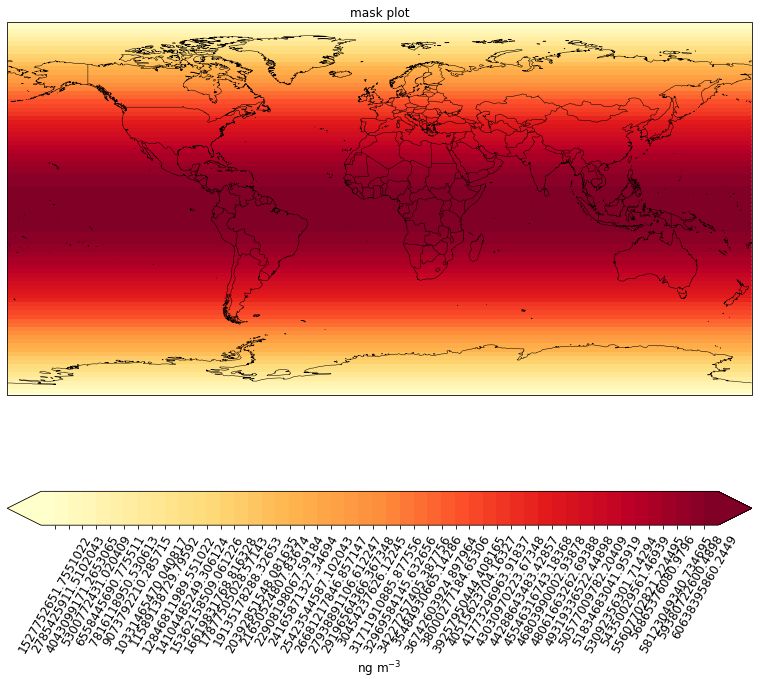

In [33]:
SA_contour = np.linspace(np.min(SA.data), np.max(SA.data))
SA_color = plt.cm.get_cmap('YlOrRd')

# _plotter(pop_dens, pop_contour, pop_color, 'population density', mask_fig_size)
_plotter(SA, SA_contour, SA_color, 'population density', mask_fig_size)

In [34]:
# sanity check the total surface area, which is probably in meters (but check)
# Iris is designed for our types of grids

# sometimes latitude and longitude are specified as just 'lat' and 'long'
# can also use iris.analysis.AVERAGE

#SA.coord('latitude').guess_bounds()
#SA.coord('longitude').guess_bounds()
SA_total = SA.collapsed(['longitude', 'latitude'], iris.analysis.SUM)
print(SA_total.data)

# surface area is in meters, convert it later

510705170000000.0


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [35]:
pop_dens_total = pop_dens.collapsed(['longitude', 'latitude'], iris.analysis.SUM)
print(pop_dens_total.data)

157085.44


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [36]:
import math

counter = 0
inf_counter = 0
none_counter = 0
for i in range(0, np.shape(pop_dens.data)[0]):
    for j in range(0, np.shape(pop_dens.data)[1]):
        if (math.isnan(pop_dens.data[i,j]) == True):
            counter +=1
        if (math.isinf(pop_dens.data[i,j]) == True):
            inf_counter +=1

print(counter, "nans")
print(inf_counter, "infs")

9781 nans
0 infs


<ipython-input-36-feb8ed87ca64>:8: UserWarning: Warning: converting a masked element to nan.
  if (math.isnan(pop_dens.data[i,j]) == True):
<ipython-input-36-feb8ed87ca64>:10: UserWarning: Warning: converting a masked element to nan.
  if (math.isinf(pop_dens.data[i,j]) == True):


In [166]:
# calculate ILCR over the whole LRTAP region minus Scandinavia

ILCR = []
ILCR_total = 0

for lat in range(0, 91):
    for long in range(0, 144):
        point = (mask.data[lat, long]).astype(float)
        conc = (BAP.data[lat, long]).astype(float)
        dens = (pop_dens.data[lat, long]).astype(float)
        area = (SA.data[lat, long]).astype(float)
        # print(type(point))
        if (point == 4):
#             if (dens == float("nan")):
#                 ndens = np.nan_to_num(dens)
#                 print(ndens, "here's pop dens w nans")
#             print(lat, long, "here's the lat and long")
#             print(conc, "BAP conc")
#             print(dens, "here's pop dens w nans")
#             print(area, "here's SA")
            calc = _ILCR(BAP_masked, URe, pop_dens, SA, 70, lat, long, 1)
#             print(calc, "ILCR calculated")
            ILCR_total += calc
print(ILCR_total, "here's the total\n")

0.0 dens  1
0.0 dens  1
59.09927371658775 here's the total



<ipython-input-165-0257f38638dc>:4: UserWarning: Warning: converting a masked element to nan.
  dens = np.nan_to_num(float(pd.data[lat,long]))


In [172]:
# calculate ILCR over the USA  (usa = 3 in mask)

ILCR = []
ILCR_total = 0

for lat in range(0, 91):
    for long in range(0, 144):
        point = (mask.data[lat, long]).astype(float)
        conc = (BAP.data[lat, long]).astype(float)
        dens = (pop_dens.data[lat, long]).astype(float)
        area = (SA.data[lat, long]).astype(float)
        # print(type(point))
        if (point == 3):
#             print(lat, long, "here's the lat and long")
#             print(conc, "BAP conc")
#             print(type(conc),  "here's conc type")
#             print((conc) == float("nan"),  "is it a nan?")
#             print(dens, "here's pop dens")
#             print(type(dens),  "here's dens type")
#             print(area, "here's SA")
            calc = _ILCR(BAP, URe, pop_dens, SA, 70, lat, long, 1)
            #print(calc, "ILCR calculated")
            ILCR_total += calc
print(ILCR_total, "here's the total over USA\n")

0.0 dens  1
0.0 dens  1
0.09032890558804402 here's the total over USA



<ipython-input-165-0257f38638dc>:4: UserWarning: Warning: converting a masked element to nan.
  dens = np.nan_to_num(float(pd.data[lat,long]))


In [167]:
BAP.data[58,33]

0.0004549915

In [182]:
# pass the desired region over which to calculate ILCR as an all-lowercase string 'region'
# rmask is the regional mask to pass as an Iris Cube
# risk is  the unit risk
# 

def _ILCR_regional(place, rmask, cube, risk, pd, area, expec, teq=1):

    mask_dict = {
        'ocean': 2,
        'usa': 3,
        'lrtap': 4,
        'row': 5,
        'china': 6,
        'denmark': 7,
        'sweden': 8,
        'norway': 9,
        'finland': 10,
        'greenland': 12,
        'russia': 14,
        'arctic': 15
    }
    
    region = mask_dict[place]


    ILCR = []
    ILCR_total = 0

    for lat in range(0, 91):
        for long in range(0, 144):
            t_point = (rmask.data[lat, long]).astype(float)
#             t_conc = (cube.data[lat, long]).astype(float)
#             t_dens = (pd.data[lat, long]).astype(float)
#             t_surf = (area.data[lat, long]).astype(float)
            if (t_point == region):
                calc = _ILCR(cube, risk, pd, area, expec, lat, long, teq)
                ILCR_total += calc
    return ILCR_total

In [176]:
# test the function over another region

_ILCR_regional('china', mask, BAP, URe, pop_dens, SA, 70, teq=1)

("here's the total\n:", 1008.5516814427817)

In [183]:
# loop through for all regions, print values, store values
areas = [
    'ocean',
    'usa',
    'lrtap',
    'row',
    'china',
    'denmark',
    'sweden',
    'norway',
    'finland',
    'greenland',
    'russia',
    'arctic']

reg_ILCRs = {}
for area in areas:
    reg = _ILCR_regional(area, mask, BAP, URe, pop_dens, SA, 70, teq=1)
    reg_ILCRs[area] = reg
print(reg_ILCRs)

<ipython-input-173-3759ff2faec1>:4: UserWarning: Warning: converting a masked element to nan.
  dens = np.nan_to_num(float(pd.data[lat,long]))


{'ocean': 15.664976874864841, 'usa': 0.09032890558804402, 'lrtap': 59.09927371658775, 'row': 503.90664181179164, 'china': 1008.5516814427817, 'denmark': 1.3548512402224724, 'sweden': 0.2831835883724514, 'norway': 0.12404679309055286, 'finland': 0.2777803411302766, 'greenland': 0, 'russia': 20.73898904005448, 'arctic': 0.047368285261626106}


In [245]:
# plot ILCR per region, as seen from global contributions, as a scatter

N = 50
x = [
    'Over Ocean',
    'USA',
    'LRTAP',
    'Rest of World',
    'East Asia',
    'Denmark',
    'Sweden',
    'Norway',
    'Finland',
    'Greenland',
    'Scandinavian Total',
    'Russia',
    'The Arctic']
y = []

In [246]:
scandi_total = 0
for area in areas:
    #print(area)
    if ((area == 'denmark') or (area == 'sweden') or (area == 'norway') or (area == 'finland')):
        #print(area,  "got nords")
        scandi_total += reg_ILCRs[area]
        print(scandi_total, "updating total 1\n")
        y.append(reg_ILCRs[area])
    if (area == 'greenland'):
        #print(area,  "got greenland")
        scandi_total += reg_ILCRs[area]
        print(scandi_total, "updating total 2\n")
        y.append(reg_ILCRs[area])
        #print(reg_ILCRs[area], "greenland ILCR\n")
        y.append(scandi_total)
    if ((area != 'denmark') and (area != 'sweden') and (area != 'norway') and (area != 'finland')) and (area != 'greenland'):
        y.append(reg_ILCRs[area])

print(x, "\n")
print(len(x))
print(y, "\n")
print(len(y))

1.3548512402224724 updating total 1

1.6380348285949238 updating total 1

1.7620816216854767 updating total 1

2.0398619628157535 updating total 1

2.0398619628157535 updating total 2

['Over Ocean', 'USA', 'LRTAP', 'Rest of World', 'East Asia', 'Denmark', 'Sweden', 'Norway', 'Finland', 'Greenland', 'Scandinavian Total', 'Russia', 'The Arctic'] 

13
[15.664976874864841, 0.09032890558804402, 59.09927371658775, 503.90664181179164, 1008.5516814427817, 1.3548512402224724, 0.2831835883724514, 0.12404679309055286, 0.2777803411302766, 0, 2.0398619628157535, 20.73898904005448, 0.047368285261626106] 

13


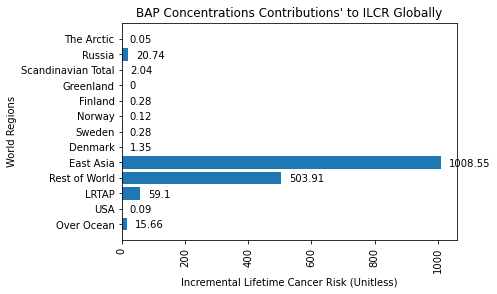

In [282]:
plt.xlabel('Incremental Lifetime Cancer Risk (Unitless)')
plt.ylabel('World Regions')
plt.title("BAP Concentrations Contributions' to ILCR Globally")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees

# add labels to bars
for i, v in enumerate(y):
    v_new = round(v, 2)
    plt.text(v_new + 25, i-0.25, str(v_new), color = 'black')

plt.barh(x, y)
plt.show()

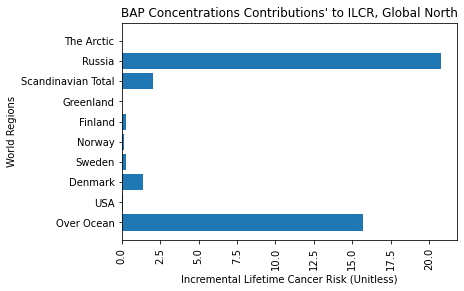

In [281]:
x_west = x[0:2] + x[5:]
y_west = y[0:2] + y[5:]

plt.xlabel('Incremental Lifetime Cancer Risk (Unitless)')
plt.ylabel('World Regions')
plt.title("BAP Concentrations Contributions' to ILCR, Global North")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees

# add labels to bars
# for i, v in enumerate(y):
#     v_new = round(v, 2)
#     plt.text(v_new, i, str(v_new), color = 'navy')

plt.barh(x_west, y_west)
plt.show()

In [ ]:
# change the life expectancy to country-wide averages or continent-wide and calculate

In [ ]:
# calculate for all PAHs and plot

In [ ]:
'''
global emissions - arctic emissions removed  
    -- this shows the rest of the world's contributions to arctic emissions
global emissions - 

Calculate and create BAP cubes with concentrations 
'''
